# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2

In [1]:
import pandas as pd

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [2]:
df = pd.read_csv("files/grades.csv")

In [3]:
# write a function to do Label encoding
def label_encoding( column ):
    list_values = list(set(column))
    dict_values = {'S' : 10 , 'A' : 9 , 'B' : 8 , 'C' : 7 , 'D' : 6 , 'E' : 5 , 'F' : 0}
    
    Labeled_data = column
    
    for i in range(Labeled_data.shape[0]) :
        Labeled_data[i] = dict_values[Labeled_data[i]]
    return Labeled_data

num_grades = label_encoding(df['Grades'])
num_grades

0      9
1     10
2      7
3      0
4     10
5      5
6      0
7      8
8      9
9     10
10     8
Name: Grades, dtype: object

Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [4]:
df = pd.read_csv("files/color.csv")

one_hot_color = pd.get_dummies(df['Color'])
one_hot_color

,Blue,Green,Red,Yellow
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,1,0
6,0,0,0,1
7,0,0,0,1


Hint : you can achieve using pandas (no need for sklearn) check the documentation

# Answer

GRADES DATASET

The categories in the data refer to the various grades which a student can obtain based on his/her performance. They have a highest grade(S) and go onto the lowest grade which is 'F'. Since the grades column forms an ordinal categorical feature wherein there is a clear hierarchial order, it is apt to follow a Label encoding scheme with the highest grade i.e. 'S' getting the highest number and so on.

COLORS DATASET 

The various categories in the colors column are the various colors which the objects are. Each color in the colors column is independent of each other i.e. they have no hierarchical order. We can use one-hot encoding for this data because the objects and colours form nominal categorical features i.e. there is no ranking order between the colours due to which we can use the one hot encoding. 

Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [5]:
def computeCost(X, y, theta,lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly
    J = (np.dot( (y - np.dot(X , theta)).T , y - np.dot(X , theta) ))/(y.shape[0])
    return J[0][0]

In [6]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10,max_iters= 1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values
    count = 0 
    J_history = []
    J_history.append(computeCost(X_appended , y , theta , lamda))
    
    while True :
        theta_grad = theta.copy()
        theta_grad[0][0] = 0 ######### this step is necessary to ensure that the intercept value is not considered in the gradient reduction
        theta_new = theta - (alpha * (np.sum((np.dot(X_appended,theta) - y) * X_appended , axis = 0).reshape(-1,1) + (lamda * theta_grad)))/y.shape[0]
        cost = computeCost(X_appended , y , theta_new , lamda)
        J_history.append(cost)
        if count >= max_iters :
            count += 1
            theta = theta_new
            break
        theta = theta_new    
        count += 1
    return theta, J_history

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [7]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("files/dataWeek4Train.npz")
data_test = np.load("files/dataWeek4Test.npz")

X_train = data['X_train'].reshape(-1,1)
y_train = data['y_train'].reshape(-1,1)

X_test = data_test['X_test'].reshape(-1,1)
y_test = data_test['y_test'].reshape(-1,1)

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

For lamda : 0 Theta :  [-0.46791175  1.06741131  0.01839844] Intercept : -0.7612751326849782 Loss : 1.8312251076887724
For lamda : 100 Theta :  [-0.0691705   1.00241723  0.00648833] Intercept : 0.07642625642953593 Loss : 2.991344943171786
For lamda : 10000 Theta :  [-0.00069241  0.14263083  0.00403168] Intercept : 11.158117632441739 Loss : 167.18577375167612


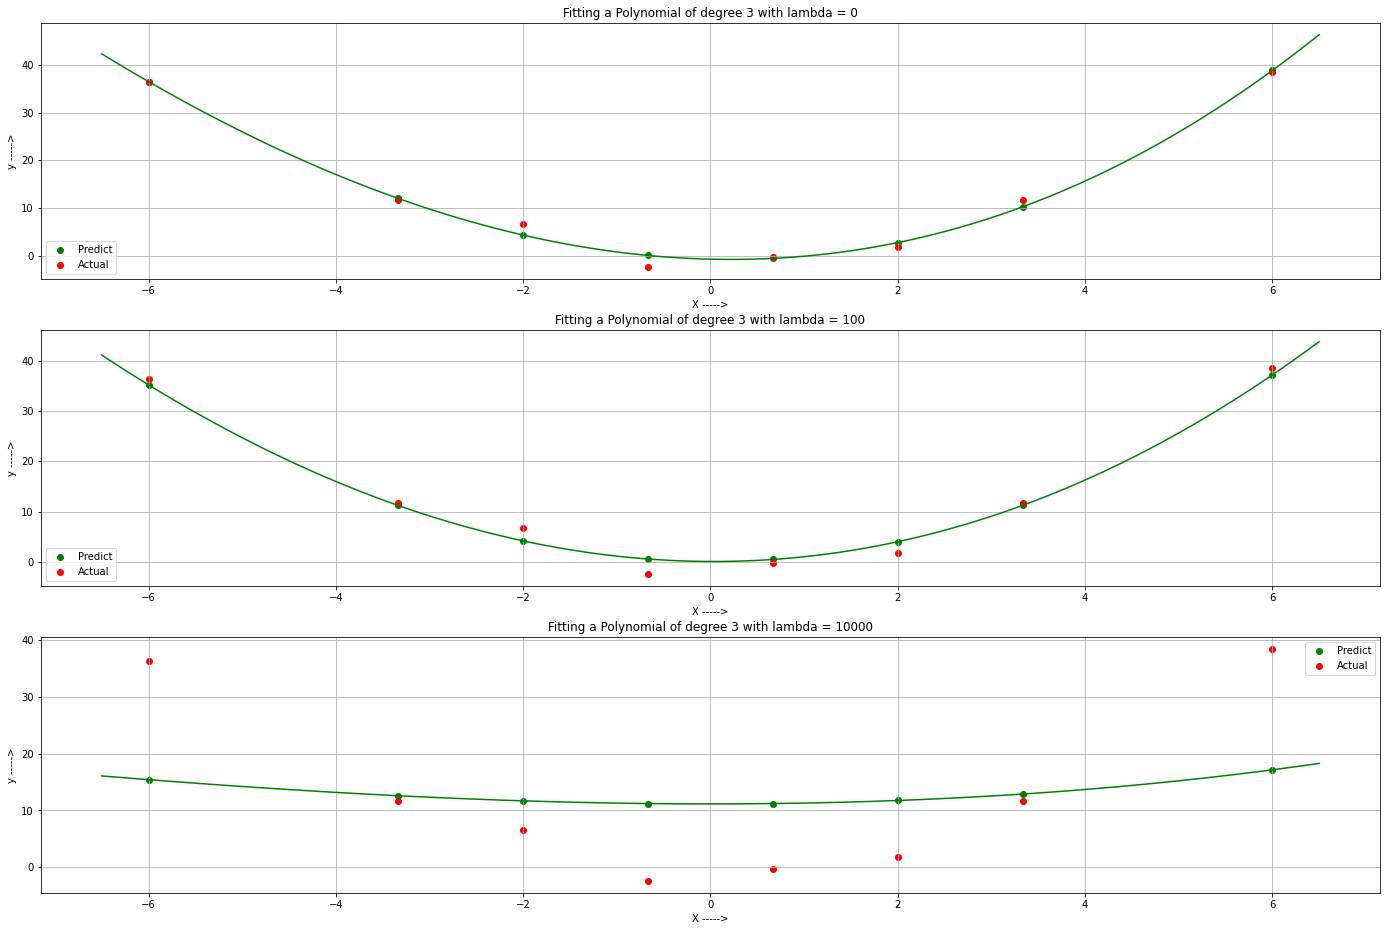

In [59]:
# Write you code Here
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_appended = poly.fit_transform(X_train) 

np.random.seed(0)
fig , axs = plt.subplots(3,1 , figsize=(24,16))
i = 0
for lamda in [0,100,10000] :
    theta = np.random.randn(X_appended.shape[1],1)
    a , b = gradientDescent(X_appended,y_train,theta,1e-4,lamda,1e6)
    
    print('For lamda :',lamda,'Theta : ',a.flatten()[1:],'Intercept :',a[0][0],'Loss :',b[-1])

    X_plot = np.linspace(-6.5 , 6.5 , 100).reshape(-1,1)
    X_plot_transform = poly.fit_transform(X_plot)

    axs[i].scatter(X_train , np.dot(X_appended,a) ,c='green', label = 'Predict' )
    axs[i].scatter(X_train,y_train,c='red' , label = 'Actual')
    axs[i].plot(X_plot , np.dot(X_plot_transform , a),c = 'green')
    axs[i].set_xlabel('X ----->')
    axs[i].set_ylabel('y ----->')
    axs[i].set_title('Fitting a Polynomial of degree 3 with lambda = '+str(lamda))
    axs[i].legend()
    axs[i].grid()
    i = i + 1 
    
plt.show()

ANSWER 

We can see that as the value of lamda increases, the numerical value of optimal theta values decreases. Also, as the value of lambda grows larger, the value of the theta approches close to zero which is clearly illustrated in the third graph above wherein the model fails to fit the training data. We can infer that as the value of lamda goes increasing, the tendency of the data to underfit increases i.e. for very low values of lamda, the data could overfit then gradually, with increasing lamda it could tend towards an optimal fit and with ever increasing lamda, it will underfit. This is because as the value of lamda increases, the emphasis of the loss function on the magnitude of theta increases which will result in favour of decresing the magnitude of theta thereby explaining the observations.

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models4

In the following exercises you can use inbuilt regressionn functions from sklearn

For lamda : 0 Theta :  [-0.46791175  1.06741131  0.01839844] Intercept : -0.7612751326860803 Training Loss : 1.831225107688773
Test Loss :  3.663485056260762
-------------------------------------------------------------------------

For lamda : 100 Theta :  [-0.0691705   1.00241723  0.00648833] Intercept : 0.07642625642934675 Training Loss : 2.991344943171563
Test Loss :  2.462199100612184
-------------------------------------------------------------------------

For lamda : 10000 Theta :  [-0.00069241  0.14263083  0.00403168] Intercept : 11.158117632451644 Training Loss : 167.18577375170443
Test Loss :  40.706826854477114
-------------------------------------------------------------------------



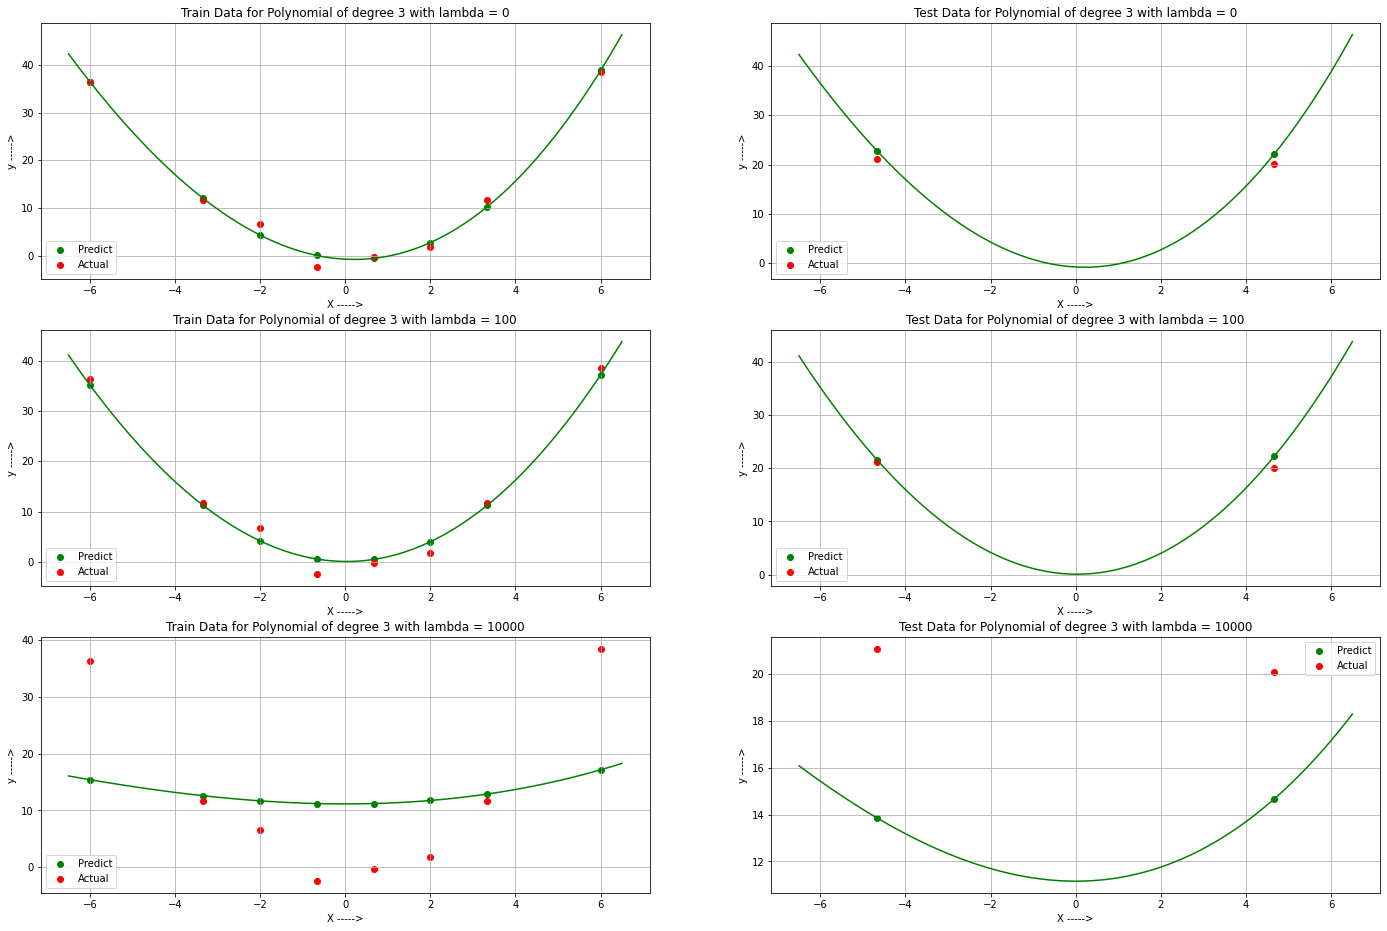

In [9]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3,include_bias = False)
X_train_appended = poly.fit_transform(X_train)
X_test_appended = poly.fit_transform(X_test)

fig , axs = plt.subplots(3,2 , figsize=(24,16))

i = 0

for lamda in [0,100,10000] :
    ridge_reg = Ridge(alpha = lamda , max_iter = 1e5)
    ridge_reg.fit(X_train_appended,y_train)
    
    print('For lamda :',lamda,'Theta : ',ridge_reg.coef_.flatten(),'Intercept :',ridge_reg.intercept_[0],'Training Loss :',mean_squared_error(y_train,ridge_reg.predict(X_train_appended)))
    print('Test Loss : ',mean_squared_error(y_test,ridge_reg.predict(X_test_appended)))
    print('-------------------------------------------------------------------------\n')
    X_plot = np.linspace(-6.5 , 6.5 , 100).reshape(-1,1)
    X_plot_transform = poly.fit_transform(X_plot)
    
    axs[i,0].scatter(X_train , ridge_reg.predict(X_train_appended) ,c='green', label = 'Predict' )
    axs[i,0].scatter(X_train,y_train,c='red' , label = 'Actual')
    axs[i,0].plot(X_plot , ridge_reg.predict(X_plot_transform),c = 'green')
    axs[i,0].set_xlabel('X ----->')
    axs[i,0].set_ylabel('y ----->')
    axs[i,0].set_title('Train Data for Polynomial of degree 3 with lambda = '+str(lamda))
    axs[i,0].legend()
    axs[i,0].grid()
    
    axs[i,1].scatter(X_test , ridge_reg.predict(X_test_appended) ,c='green', label = 'Predict' )
    axs[i,1].scatter(X_test,y_test,c='red' , label = 'Actual')
    axs[i,1].plot(X_plot , ridge_reg.predict(X_plot_transform),c = 'green')
    axs[i,1].set_xlabel('X ----->')
    axs[i,1].set_ylabel('y ----->')
    axs[i,1].set_title('Test Data for Polynomial of degree 3 with lambda = '+str(lamda))
    axs[i,1].legend()
    axs[i,1].grid()
    
    i = i + 1 
    
plt.show()

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

Mean Squared Error for linear Regression : 4.507892528200593e-19
Coefficients : [ 1.55313416e+00  1.60950532e-01  4.42676378e-01  4.86390666e-01
 -4.54833769e-01 -4.55957119e-02  4.68974250e-02  9.10972294e-04
 -9.62059801e-04]


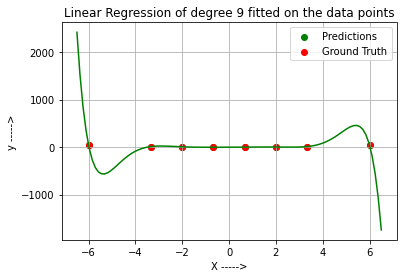

Test Error :  90916.94671882183


In [10]:
''' Import neccessay packages '''
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def regression(X,Y,reg_type ="ridge",degree = 9,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    
    poly = PolynomialFeatures(degree,include_bias = False)
    X_appended = poly.fit_transform(X.reshape(-1,1))
    
    if reg_type == 'linear' :
        reg = LinearRegression()
        reg.fit(X_appended,Y)
        
        return reg.predict(X_appended) , mean_squared_error(Y,reg.predict(X_appended)), reg
        
    elif reg_type == 'ridge' :
        reg = Ridge(alpha = alpha,max_iter = 1e7)
        reg.fit(X_appended,Y)
        
        return reg.predict(X_appended) , mean_squared_error(Y,reg.predict(X_appended)), reg
    
    elif reg_type == 'lasso' :
        reg = Lasso(alpha = alpha,max_iter = 1e7)
        reg.fit(X_appended,Y)
        
        return reg.predict(X_appended) , mean_squared_error(Y,reg.predict(X_appended)), reg
    else : 
        print('Invalid option for Regression Type used')
# Plotting and calling the function

y_pred , mse , reg = regression(X_train , y_train , 'linear')
poly = PolynomialFeatures(9,include_bias = False)
x_plot = np.linspace(-6.5,6.5,100)
y_plot = reg.predict(poly.fit_transform(x_plot.reshape(-1,1)))

print('Mean Squared Error for linear Regression :',mse)
print('Coefficients :',reg.coef_.flatten())
plt.plot(x_plot , y_plot , c = 'green')
plt.scatter(X_train , y_pred , c ='green',label = 'Predictions')
plt.scatter(X_train , y_train , c = 'red',label = 'Ground Truth')
plt.grid()
plt.title('Linear Regression of degree 9 fitted on the data points')
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.legend()
plt.show()

print('Test Error : ',mean_squared_error(y_test,reg.predict(poly.fit_transform(X_test.reshape(-1,1)))))

The plot above clearly shows that the function has overfitted the data. The ground truth and the predicted points completely coincide with other which is shown by the mean squeared error estimate on train data which approaches almost zero.

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

/home/aghanims/DS_LAB/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.11059e-17): result may not be accurate.
  overwrite_a=False)
/home/aghanims/DS_LAB/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/aghanims/DS_LAB/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


For Lamda :  0
Ridge Regression - Training Loss : 2.2902932243206462e-09 Coefficients : [ 1.55311589e+00  1.60950396e-01  4.42670612e-01  4.86390255e-01
 -4.54830111e-01 -4.55956733e-02  4.68970719e-02  9.10971485e-04
 -9.62052677e-04]
Lasso Regression - Training Loss : 0.04443994036569068 Coefficients : [ 1.53172008e+00  1.83625015e+00 -1.01898536e+00 -6.36281182e-02
  9.51198163e-02  8.02123480e-04 -1.24220805e-03  1.10142796e-05
 -1.78534248e-05]
----------------------------------------------------------------------------



/home/aghanims/DS_LAB/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.400440028577488, tolerance: 0.17776156780405508
  positive)


For Lamda :  1
Ridge Regression - Training Loss : 0.08782145413142864 Coefficients : [ 7.44087432e-01  1.59227945e-01  1.92013274e-01  4.81194876e-01
 -2.78408866e-01 -4.49910155e-02  2.98141610e-02  8.98204883e-04
 -6.17800750e-04]
Lasso Regression - Training Loss : 0.4782420810282944 Coefficients : [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.33482794e-01
 -1.08243502e-01 -3.80715418e-02  1.27258930e-02  7.45914211e-04
 -2.69868543e-04]
----------------------------------------------------------------------------

For Lamda :  100000.0
Ridge Regression - Training Loss : 4.876340595986357 Coefficients : [-7.44481537e-05  2.43355499e-04 -3.10644737e-04  1.58106688e-03
 -8.54353735e-04  9.95073541e-03  6.17908874e-05 -2.56149945e-04
 -9.43202870e-07]
Lasso Regression - Training Loss : 22.07614905729678 Coefficients : [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.93067649e-05
  1.03278897e-07]
------------------

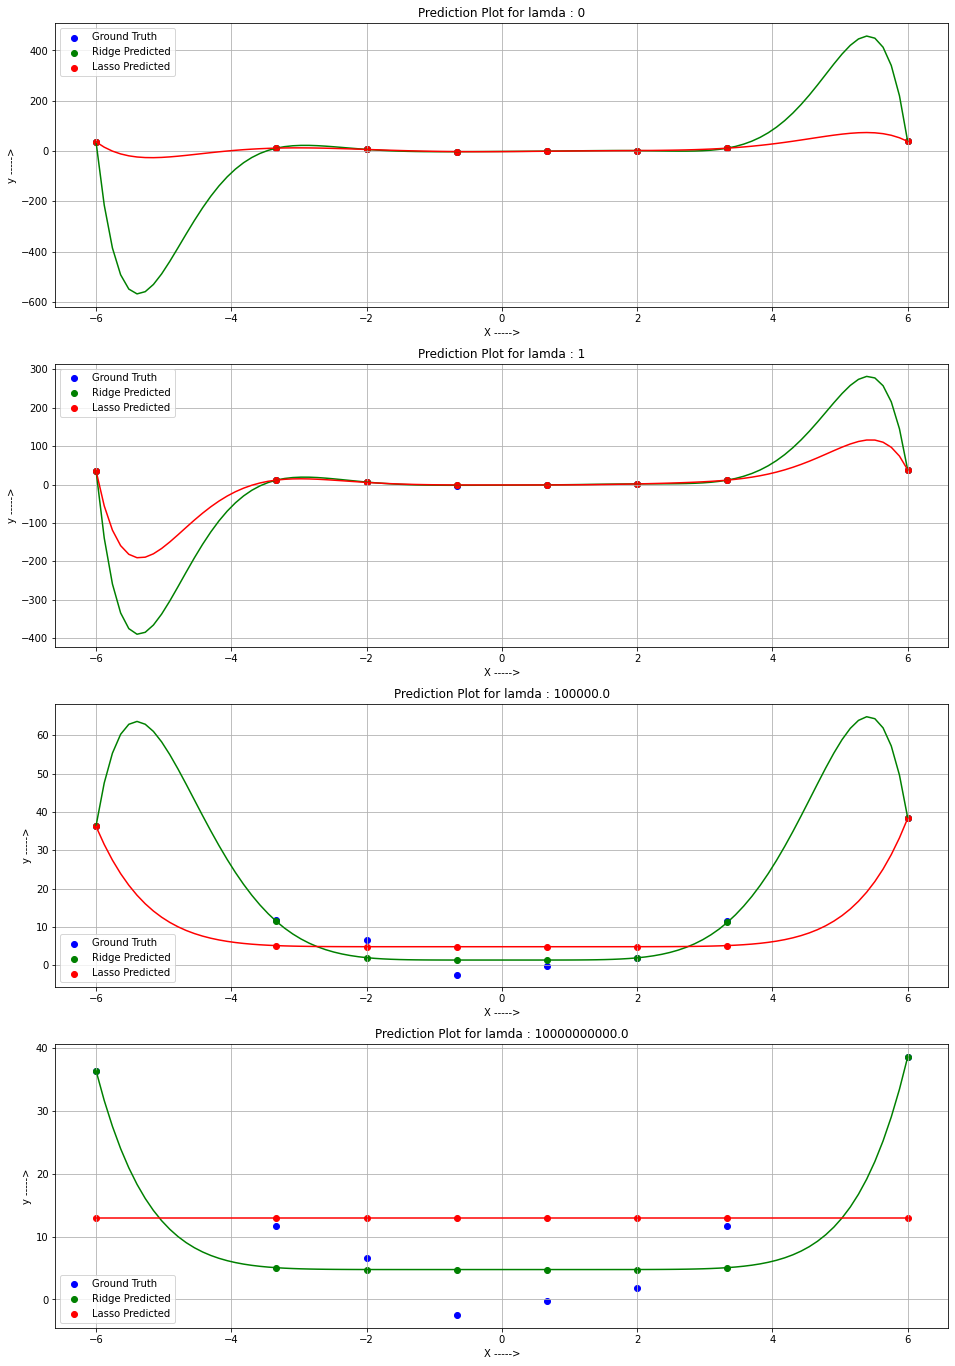

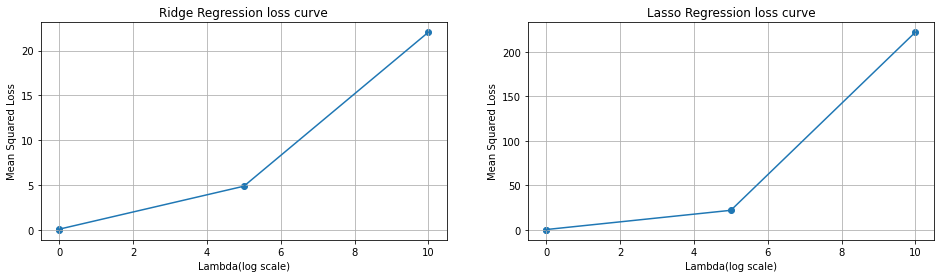

In [11]:
# Write your code here, plot the prediction on the train data, and print the coefficients learned for ridge and lasso
# You can combine both Ridge and Lasso, But for Train error vs Lambda, plot them seperately for lasso and ridge

lamda = [0,1,1e5,1e10]
poly = PolynomialFeatures(9,include_bias = False)
x_plot = np.linspace(-6,6,100)
mse_ridge_list , mse_lasso_list = [] , []
reg_ridge_list , reg_lasso_list = [] , []

fig , axs = plt.subplots(4,1,figsize=(16,24))

i = 0

for l in lamda : 
    y_pred_ridge , mse_ridge , reg_ridge = regression(X_train , y_train , 'ridge',alpha = l)
    y_pred_lasso , mse_lasso , reg_lasso = regression(X_train , y_train , 'lasso',alpha = l)
    mse_ridge_list.append(mse_ridge)
    mse_lasso_list.append(mse_lasso)
    reg_ridge_list.append(reg_ridge)
    reg_lasso_list.append(reg_lasso)
    
    print('For Lamda : ',l)
    print('Ridge Regression - Training Loss :',mse_ridge,'Coefficients :',reg_ridge.coef_.flatten())
    print('Lasso Regression - Training Loss :',mse_lasso,'Coefficients :',reg_lasso.coef_.flatten())
    print('----------------------------------------------------------------------------\n')
    
    axs[i].scatter(X_train,y_train,c ='blue',label='Ground Truth')
    axs[i].scatter(X_train,y_pred_ridge,c='green',label='Ridge Predicted')
    axs[i].plot(x_plot,reg_ridge.predict(poly.fit_transform(x_plot.reshape(-1,1))),c='green')
    axs[i].scatter(X_train,y_pred_lasso,c='red',label='Lasso Predicted')
    axs[i].plot(x_plot,reg_lasso.predict(poly.fit_transform(x_plot.reshape(-1,1))),c='red')
    axs[i].set_xlabel('X ----->')
    axs[i].set_ylabel('y ----->')
    axs[i].set_title('Prediction Plot for lamda : '+str(l))
    axs[i].grid()
    axs[i].legend()
    i+=1
    
plt.show()  

fig , axs = plt.subplots(1,2,figsize = (16,4))

axs[0].plot([0,1e-10,5,10] , mse_ridge_list)
axs[0].scatter([0,1e-10,5,10],mse_ridge_list)
axs[0].grid()
axs[0].set_title('Ridge Regression loss curve')
axs[0].set_xlabel('Lambda(log scale)')
axs[0].set_ylabel('Mean Squared Loss')

axs[1].plot([0,1e-10,5,10] , mse_lasso_list)
axs[1].scatter([0,1e-10,5,10] , mse_lasso_list)
axs[1].grid()
axs[1].set_title('Lasso Regression loss curve')
axs[1].set_xlabel('Lambda(log scale)')
axs[1].set_ylabel('Mean Squared Loss')

plt.show()

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

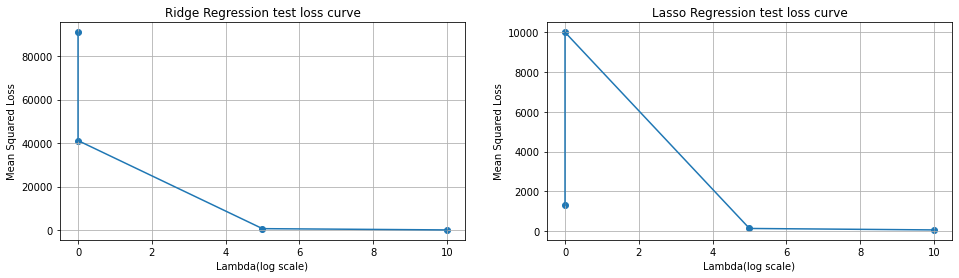

In [12]:
# write your code here
test_mse_ridge_list , test_mse_lasso_list = [] , []

for i in range(4) : 
    test_mse_ridge_list.append(mean_squared_error(y_test,reg_ridge_list[i].predict(poly.fit_transform(X_test))))
    test_mse_lasso_list.append(mean_squared_error(y_test,reg_lasso_list[i].predict(poly.fit_transform(X_test))))

fig , axs = plt.subplots(1,2,figsize = (16,4))

axs[0].plot([0,1e-10,5,10] , test_mse_ridge_list)
axs[0].scatter([0,1e-10,5,10] , test_mse_ridge_list)
axs[0].grid()
axs[0].set_title('Ridge Regression test loss curve')
axs[0].set_xlabel('Lambda(log scale)')
axs[0].set_ylabel('Mean Squared Loss')

axs[1].plot([0,1e-10,5,10] , test_mse_lasso_list)
axs[1].scatter([0,1e-10,5,10] , test_mse_lasso_list)
axs[1].grid()
axs[1].set_title('Lasso Regression test loss curve')
axs[1].set_xlabel('Lambda(log scale)')
axs[1].set_ylabel('Mean Squared Loss')

plt.show()

OBSERVATIONS

1) From the plots above we can observe the following, the use of lambda for regularisation helps in reducing the overfitting which occured incase of Linear Regression without regularization.

2) It should also be noted that in Lasso Regression, some coefficients are found to be absolute zeros which could be used as a method of feature selection. 

3) The loss functions show that the train loss increases as the value of lambda is increased. This points to the fact that presence of lambda tends to decrease the model complexity thereby reducing the overfitting on training data which in turn increases the training error. However, as seen in the test loss, for increased values of lambda as in case of 1e5, the test loss decreases when compared to lambda = 0 which shows that regularization aids in generalizing of the model to unseen data.

### Questions and Observations

- What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?

Ans: My observation when simple Linear Regression was used with degree 9 polynomial is that the model was overfitting the training data. This is pretty evident from the fact that the number of training examples were 8 whereas the number of learnable parameters are 10. This gives the model absolute liberty to exactly fit the 8 training points resulting in an almost zero training error. However, the test error is extremely high since the model couldn't generalize. This is owning to the extremely low bias but very high variance. 

-  As value of lambda increases what happens to the model complexity?

Ans: As the value of lambda increases, in terms of model complexity it decreases. In terms of bias variance, as the value of lambda increases, bias of the model increases. However, at the same time this is accompanied by a reduction in variance of the model.  

- What can be infered from the mean squared error versus lambda?

Ans: One point to note is that when using Lasso, the lambda = 0 case is not calculated accurately.This is seconded by a warning produced which asks the user not to include lambda =0 for Lasso. However, from the prior linear regression calculation, we know that the test error value is 90k which is much more than when using other lambda values. From the mean squared error vs lambda we can say that as the lambda is increased, the training error increases which could be attributed to decrease in overfitting of the model. This is further attested in the test loss curves wherein models with higher lambda values have a smaller test loss. 

- Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)

Ans: True. Through controlling the value of lambda, we can have an added degree of freedom apart from the degree of the polynomial. For instance, if it was found that for a specific degree a given model is overfitting, we could regulate the value of lambda and verify if there was a particular lambda for which we could ensure that we had a better fit in terms of validation error.

- Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?

Ans: As already stated above, we can see from the train error vs lambda curve that as the value of the lambda increases, the train error increases which could be accounted to the fact that with increased lambda, the theta as a whole is constrained to take smaller values thereby preventing it to overfit the training data. From the test error vs lambda curve, we can observe the fact that although the train error increases for higher values of lambda, the test error decreases which shows the fact that the model is able to generalize better on test data unlike LinearRegression case wherein the model was overfitting the training data.
